In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [4]:
# Data: Tamil Movies (with sample ratings and vote counts)
data = {
    'Title': [
        'Vikram', 'Master', 'Kaithi', 'Jailer', 'Beast',
        'Leo', 'Asuran', 'Viduthalai Part 1', 'Thunivu', 'Maamannan'
    ],
    'Year': [2022, 2021, 2019, 2023, 2022, 2023, 2019, 2023, 2023, 2023],
    'Director': [
        'Lokesh Kanagaraj', 'Lokesh Kanagaraj', 'Lokesh Kanagaraj', 'Nelson Dilipkumar', 'Nelson Dilipkumar',
        'Lokesh Kanagaraj', 'Vetrimaaran', 'Vetrimaaran', 'H. Vinoth', 'Mari Selvaraj'
    ],
    'Writer': [
        'Lokesh Kanagaraj', 'Lokesh Kanagaraj', 'Lokesh Kanagaraj', 'Nelson Dilipkumar', 'Nelson Dilipkumar',
        'Lokesh Kanagaraj', 'Vetrimaaran', 'Vetrimaaran', 'H. Vinoth', 'Mari Selvaraj'
    ],
    'Stars': [
        'Kamal Haasan, Vijay Sethupathi, Fahadh Faasil',
        'Thalapathy Vijay, Vijay Sethupathi, Malavika Mohanan',
        'Karthi, Narain, Dheena',
        'Rajinikanth, Vinayakan, Ramya Krishnan',
        'Vijay, Pooja Hegde, Selvaraghavan',
        'Vijay, Trisha, Arjun Sarja',
        'Dhanush, Manju Warrier, Pasupathy',
        'Soori, Vijay Sethupathi, Gautham Vasudev Menon',
        'Ajith Kumar, Manju Warrier, Samuthirakani',
        'Udhayanidhi Stalin, Vadivelu, Fahadh Faasil'
    ],
    'Rating': [8.3, 7.9, 8.5, 7.5, 6.2, 7.8, 8.6, 8.0, 6.5, 7.2],
     'Votes': [95000, 88000, 72000, 67000, 49000, 81000, 89000, 50000, 46000, 40000]
}



In [5]:
# Create DataFrame
df = pd.DataFrame(data)



In [6]:
# Weighted average calculation
C = df['Rating'].mean()
m = df['Votes'].quantile(0.6)
df['Weighted_Average'] = ((df['Rating'] * df['Votes']) + (C * m)) / (df['Votes'] + m)


In [7]:
# Sort by weighted average
df_sorted = df.sort_values(by='Weighted_Average', ascending=False)



C:\Users\nithy\AppData\Local\Temp\ipykernel_2072\3181717778.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


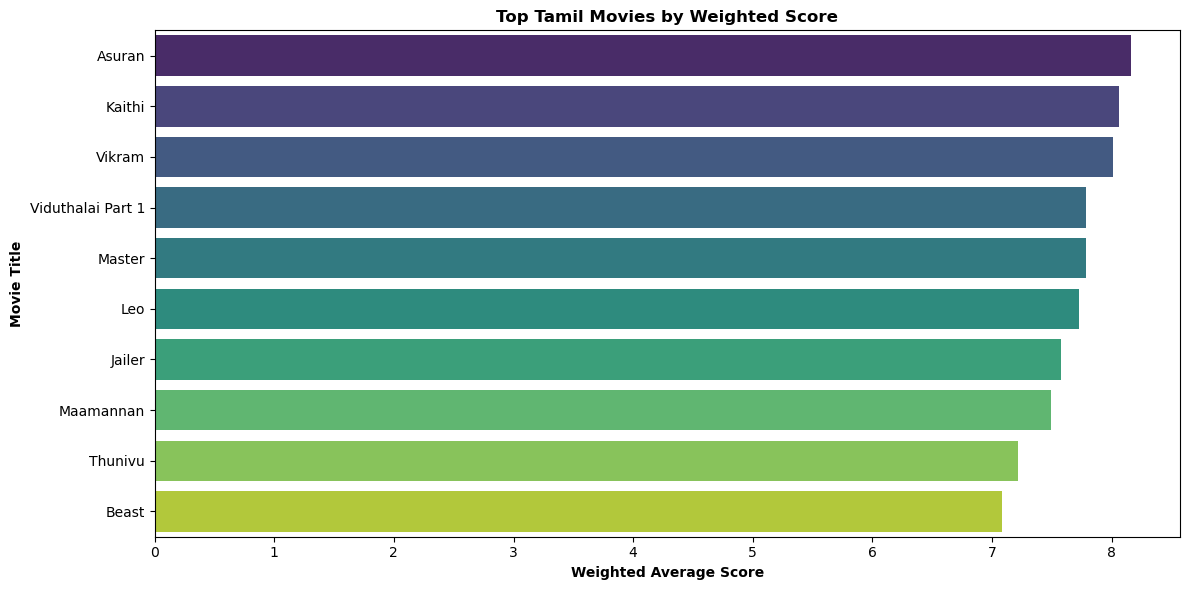

In [8]:
# Plot: Top 10 by Weighted Average
plt.figure(figsize=(12,6))
sns.barplot(
    x='Weighted_Average', y='Title',
    data=df_sorted.head(10), palette='viridis'
)
plt.title("Top Tamil Movies by Weighted Score", weight='bold')
plt.xlabel("Weighted Average Score", weight='bold')
plt.ylabel("Movie Title", weight='bold')
plt.tight_layout()
plt.savefig("top_tamil_movies.png")
plt.show()

